<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/newversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Map Driver##

In [435]:
#from google.colab import drive
#drive.mount('/content/drive')

##Import Packages ## 

In [436]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [437]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [438]:
print("Problematic records in training data: ",train_data.isnull().sum().sum())
print("Problematic records in test data: ",test_data.isnull().sum().sum())

Problematic records in training data:  0
Problematic records in test data:  0


##Train Data Preprocessing##

Dataset Shape

In [439]:
print(train_data.shape)

(6237, 9)


Peek of the data

In [440]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [441]:
#train_data.where(train_data['Author']=='Agatha Christie').dropna().count
train_data['Author'].nunique()

3679

Data type for each column

In [442]:
print(train_data.dtypes)

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object


Statistical summary

In [443]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

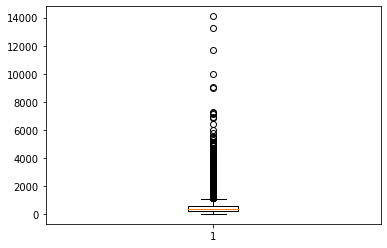

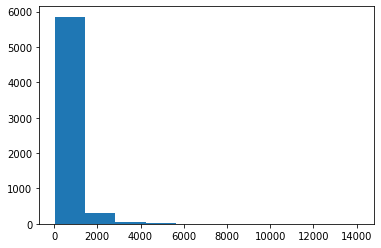

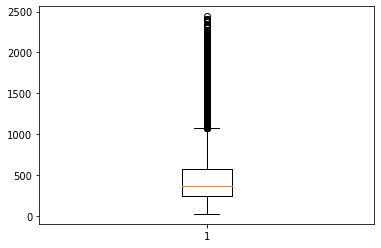

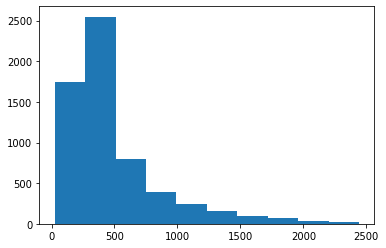

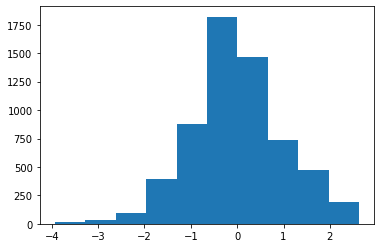

In [444]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
q1 = np.percentile(train_data.Price, 25)  # Q1
q3 = np.percentile(train_data.Price, 75)  # Q3
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()


power = PowerTransformer()
train_data[['Price']] = power.fit_transform(train_data[['Price']])
plt.hist(train_data['Price'])
plt.show()

Reviews Normalization

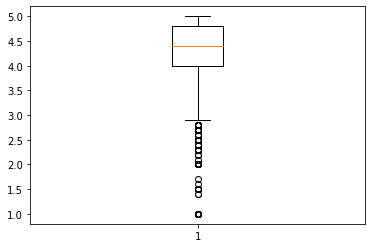

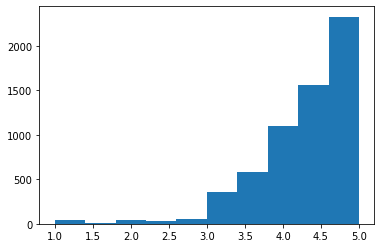

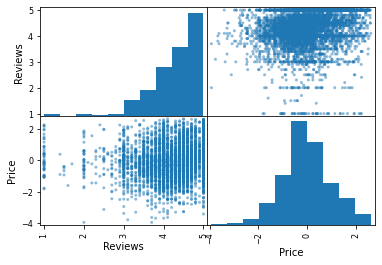

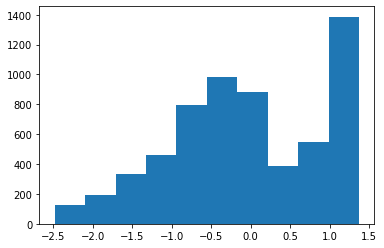

In [445]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()
pdplt.scatter_matrix(train_data[['Reviews','Price']])
plt.show()
train_data[['Reviews']] = power.fit_transform(train_data[['Reviews']])
plt.hist(train_data['Reviews'])
plt.show()
#train_data['Reviews'] = (train_data.Reviews - train_data.Reviews.min())/(train_data.Reviews.max() - train_data.Reviews.min()) # normalize reviews 


Ratings Normalization

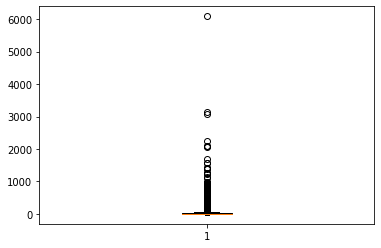

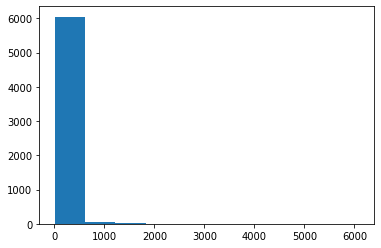

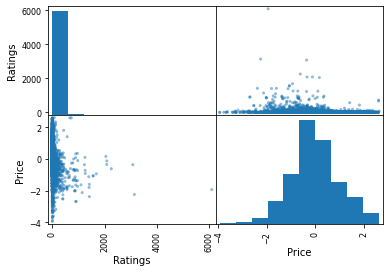

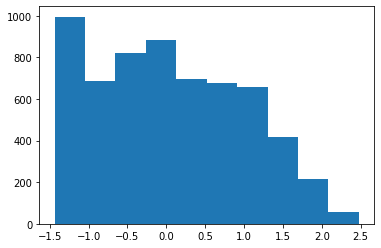

In [446]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()
pdplt.scatter_matrix(train_data[['Ratings','Price']])
plt.show()
train_data['Ratings'] = power.fit_transform(train_data[['Ratings']])
plt.hist(train_data['Ratings'])
plt.show()
#train_data['Ratings'] = (train_data.Ratings - train_data.Ratings.min())/(train_data.Ratings.max() - train_data.Ratings.min()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [447]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [448]:
train_data['Edition_Year'] = train_data['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
#train_data.pop('Edition')

In [449]:
train_data.head()

,Edition,Reviews,Ratings,BookCategory,Price,Edition_Year
0,"Paperback,– 10 Mar 2016",-0.679329,0.123545,Action & Adventure,-0.784530,2016
1,"Paperback,– 7 Nov 2012",-0.826066,0.512777,"Biographies, Diaries & True Accounts",-0.901000,2012
2,"Paperback,– 25 Feb 1982",0.866953,-0.090929,Humour,-0.343037,1982
3,"Paperback,– 5 Oct 2017",-0.523208,0.463618,"Crime, Thriller & Mystery",-1.074090,2017
4,"Hardcover,– 10 Oct 2006",1.372769,-1.437533,"Arts, Film & Photography",1.328042,2006


Book Category Normalization / Extract Categories

In [450]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [451]:
z = train_data

In [452]:
train_data.head()

,Edition,Reviews,Ratings,Price,Edition_Year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,"Paperback,– 10 Mar 2016",-0.679329,0.123545,-0.784530,2016,0,0,0,0,0,0,0,0,0,0
1,"Paperback,– 7 Nov 2012",-0.826066,0.512777,-0.901000,2012,0,1,0,0,0,0,0,0,0,0
2,"Paperback,– 25 Feb 1982",0.866953,-0.090929,-0.343037,1982,0,0,0,0,0,1,0,0,0,0
3,"Paperback,– 5 Oct 2017",-0.523208,0.463618,-1.074090,2017,0,0,0,0,1,0,0,0,0,0
4,"Hardcover,– 10 Oct 2006",1.372769,-1.437533,1.328042,2006,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [453]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
# test_data['Reviews'] = (test_data.Reviews - test_data.Reviews.mean())/(test_data.Reviews.std()) # normalize reviews 

Ratings Normalization

In [454]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
# test_data['Ratings'] = (test_data.Ratings - test_data.Ratings.mean())/(test_data.Ratings.std()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [455]:
test_data.pop('Author')
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [456]:
# test_data['Edition'] = test_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
# test_editions = test_data['Edition'].unique()
# total_editions = np.unique(np.append(editions,test_editions))
# print(total_editions)
# test_data= pd.get_dummies(test_data, columns= ['Edition'])
# test_data[editions] = 0
#Remove edition column because we have different editions on train set and different editions on test set
test_data.pop('Edition')

0       Mass Market Paperback,– 1 Oct 1986
1          Paperback,– Import, 26 Apr 2018
2                  Paperback,– 17 Mar 2011
3                         Paperback,– 2016
4                  Paperback,– 26 Dec 2011
                       ...                
1555               Paperback,– 14 Apr 2011
1556                Paperback,– 8 May 2013
1557                Paperback,– 6 Sep 2011
1558               Paperback,– 22 Sep 2009
1559               Paperback,– 16 Sep 2016
Name: Edition, Length: 1560, dtype: object

In [457]:
test_data.head()

,Reviews,Ratings,BookCategory
0,4.4,960.0,"Crime, Thriller & Mystery"
1,5.0,1.0,"Computing, Internet & Digital Media"
2,5.0,4.0,Romance
3,4.1,11.0,"Computing, Internet & Digital Media"
4,4.4,9.0,"Language, Linguistics & Writing"


Book Category Normalization / Extract Categories

In [458]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [459]:
z_test = test_data
z_test.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.4,960.0,0,0,0,0,1,0,0,0,0,0
1,5.0,1.0,0,0,0,1,0,0,0,0,0,0
2,5.0,4.0,0,0,0,0,0,0,0,0,1,0
3,4.1,11.0,0,0,0,1,0,0,0,0,0,0
4,4.4,9.0,0,0,0,0,0,0,1,0,0,0


##Training Feed Forward Model##

Split Train Set in Train  & Validation Sets(70/30)

In [460]:
############# inputs to the neural network #######################
train_set = z.sample(frac=0.7,random_state=200)
validation_set = z.drop(train_set.index)
######################### normalized target outputs for training set##########
y_train_set = train_set.pop('Price')
y_train_set_max = y_train_set.max()
y_train_set_min = y_train_set.min()
y_train_set = (y_train_set - y_train_set_min) /( y_train_set_max - y_train_set_min)

########################## normalized target outputs for validation set #######
y_validation_set = validation_set.pop('Price')
y_validation_set_max = y_validation_set.max()
y_validation_set_min = y_validation_set.min()
y_validation_set = (y_validation_set - y_validation_set_min) /( y_validation_set_max - y_validation_set_min)

Import tensorflow

In [461]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Build model/neural network

In [462]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid', input_shape=(train_set.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1,activation='sigmoid'))

In [463]:
network.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


Compile model

In [464]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                ) # Mean squared error

Model Training

In [465]:
# Train neural network
history = network.fit(train_set, # Features
                      y_train_set, # Target vector
                      epochs=30, # Number of epochs
                      verbose=1, # Output
                      batch_size=100, # Number of observations per batch
                      validation_data=(validation_set,y_validation_set)) # Data for evaluation

ValueError: ignored

##Predict Prices Using Feed Forward Neural Network##

Predict

In [ ]:
predictions = network.predict(z_test)


Denormalize

In [ ]:
actual_prices = (predictions*(y_train_set_max - y_train_set_min)) + y_train_set_min

Save prediction to Excel File

In [ ]:
df = pd.DataFrame(actual_prices.astype(int))
df.columns=['Price']
filepath = 'Predictions.xlsx'
df.to_excel(filepath, index=False)
df.head()

##SVR##

Split train and test data


In [ ]:
y = train_data.pop('Price').to_numpy()
X = train_data.to_numpy()

Import packages

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Create pipelines

In [ ]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



Decision Tree Regressor

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

Gradient Boosting Regressor

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(rescaled_X_train, y)

In [ ]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

In [ ]:
df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
filepath2 = 'Predictions2.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()

Random Forest regressor

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor()
model.fit(rescaled_X_train, y)

In [ ]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

In [ ]:
df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

KNeighbors Regressor

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor()
model.fit(rescaled_X_train, y)

In [ ]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

In [ ]:
df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head()

Elastic Net

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet()
model.fit(rescaled_X_train, y)

In [ ]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

In [ ]:
df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

Lasso

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso()
model.fit(rescaled_X_train, y)

In [ ]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

In [ ]:
df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()

Linear Regression

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = LinearRegression()
model.fit(rescaled_X_train, y)

In [ ]:
scaler = StandardScaler().fit(test_data)
rescaled_X_test = scaler.transform(test_data)
predictions = model.predict(rescaled_X_test)

In [ ]:
df7 = pd.DataFrame(predictions.astype(int))
df7.columns=['Price']
filepath7 = 'Predictions_LinearRegression.xlsx'
df7.to_excel(filepath7, index=False)
df7.head()